import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
#import wradlib
import pyart

In [6]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np
#from vega_datasets import data as vds

In [25]:
# Read in the file, create a RadarMapDisplay object
filename = 'MDV-20150805-084449-PPIVol.nc'
radar = pyart.io.read(filename)
display = pyart.graph.RadarMapDisplay(radar)

In [26]:
# Setting projection and ploting the second tilt
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


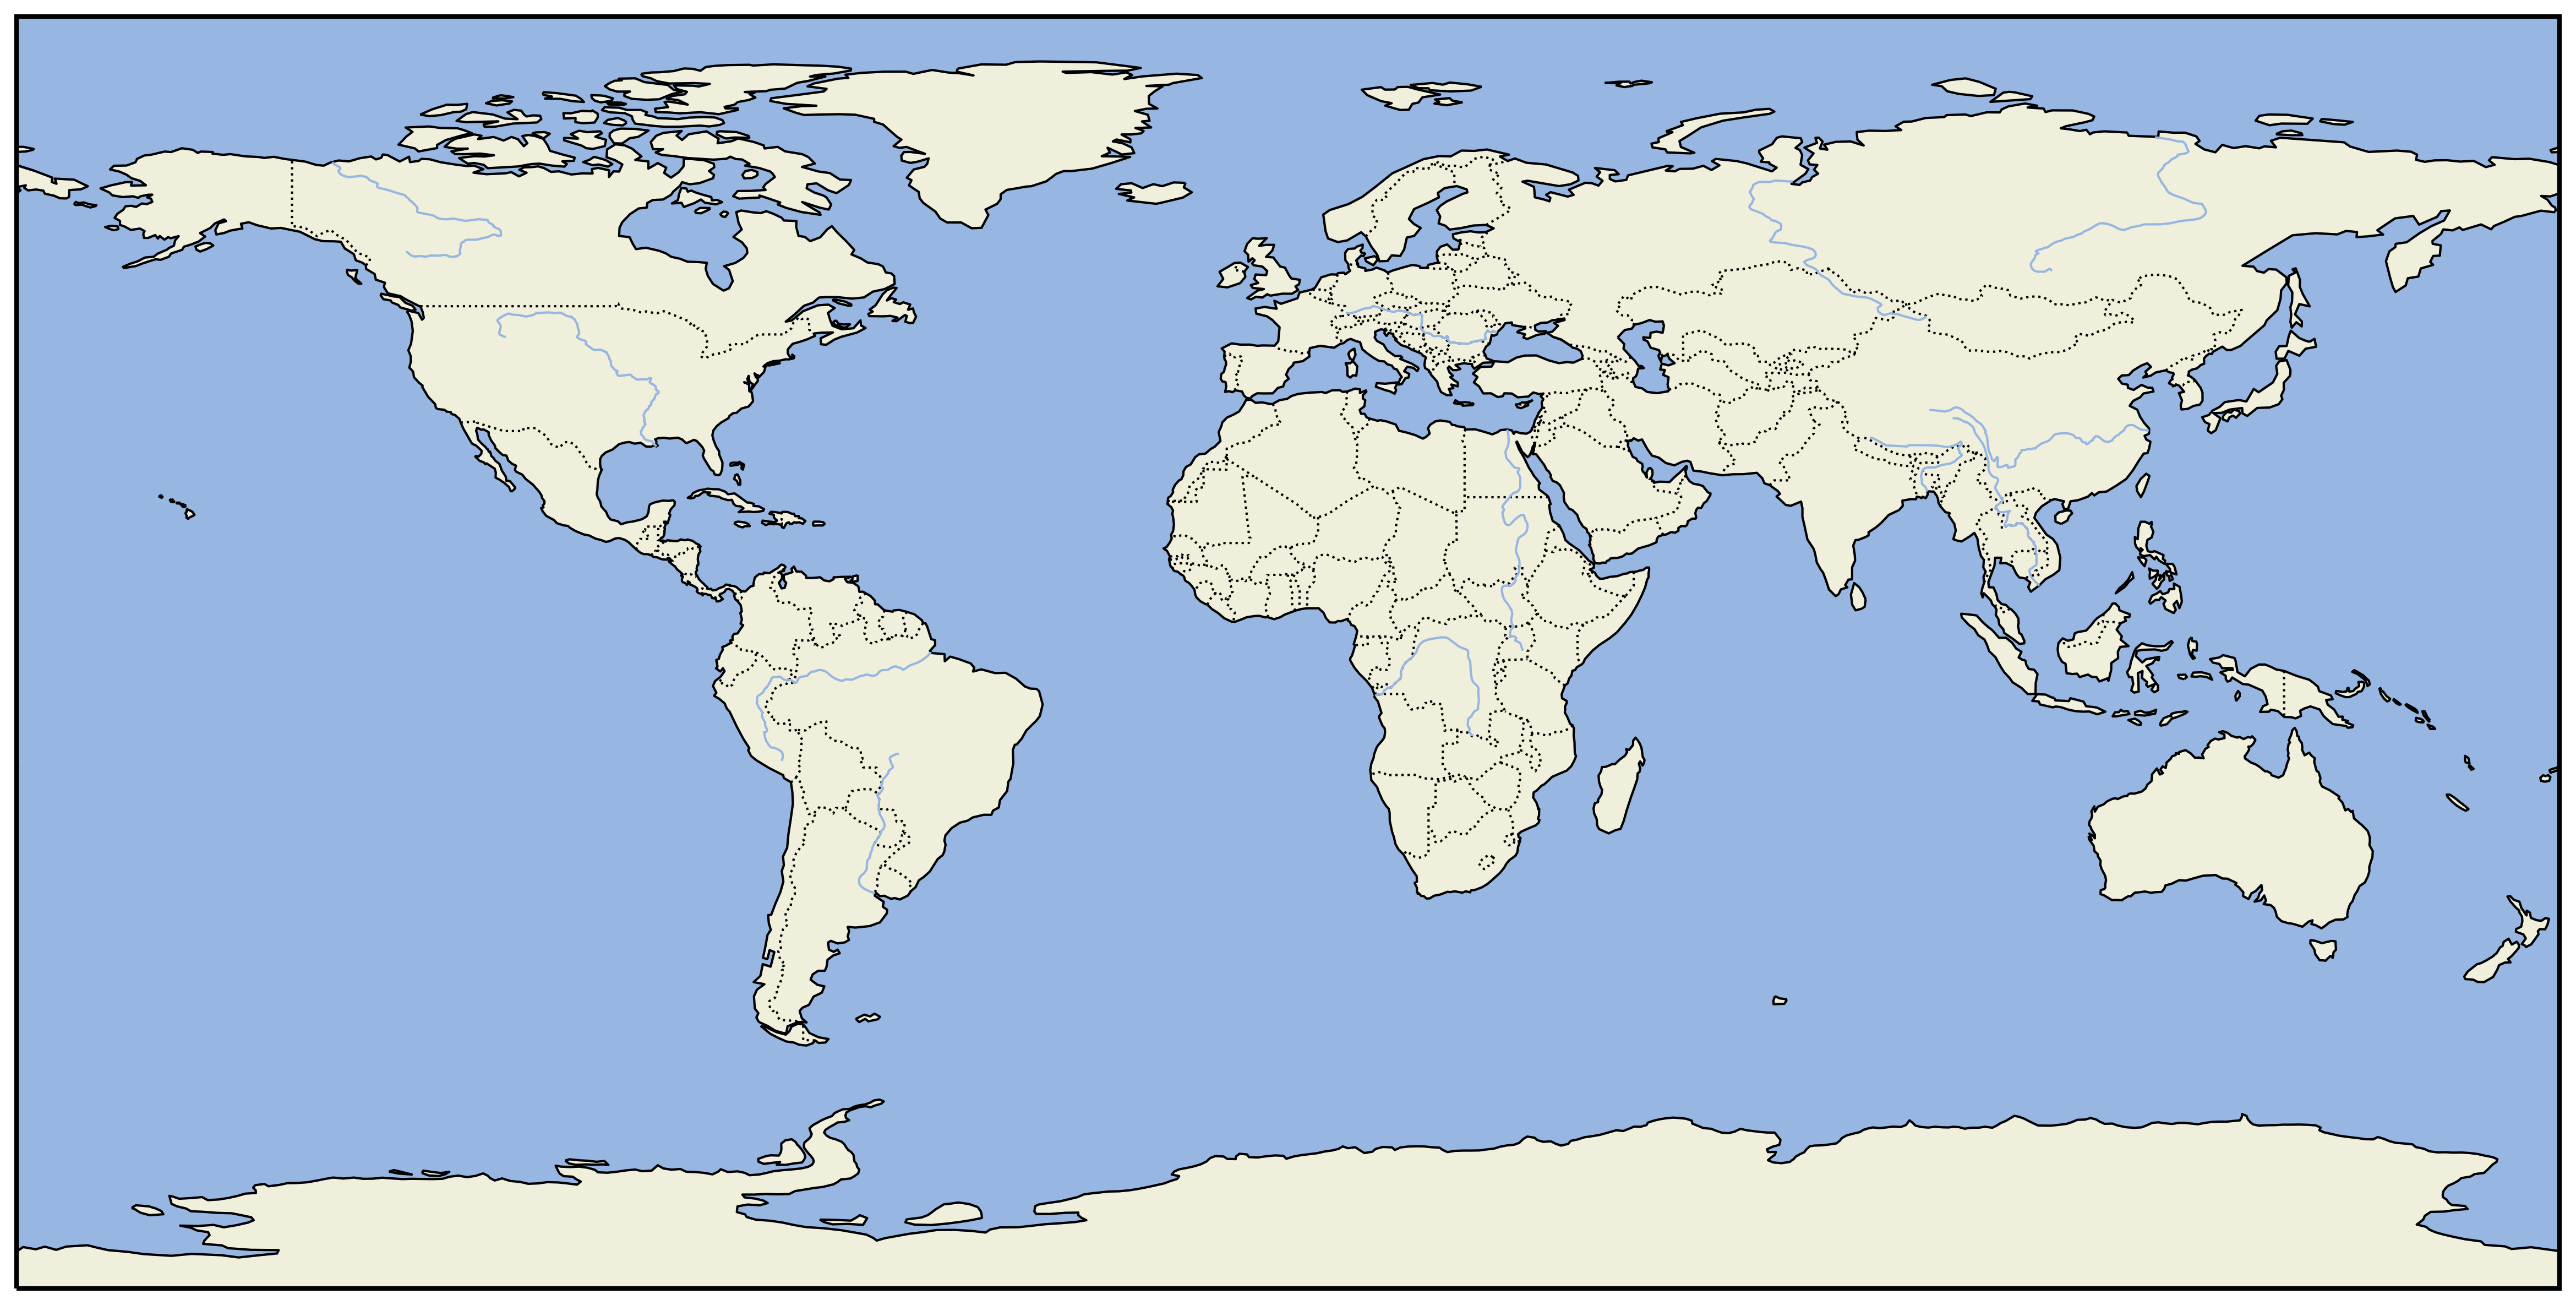

In [33]:
fig = plt.figure(figsize=[20,8],dpi=300)
display.plot_ppi_map('DBZH', 1, vmin=-10, vmax=60,
                     min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],cmap='jet')

m4 = plt.axes(projection=ccrs.PlateCarree())

m4.add_feature(cfeature.LAND)
m4.add_feature(cfeature.OCEAN)
m4.add_feature(cfeature.COASTLINE)
m4.add_feature(cfeature.BORDERS, linestyle=':')
#m4.add_feature(cfeature.LAKES, alpha=0.5)
m4.add_feature(cfeature.RIVERS)




# Plot range rings at 30, 60, 90, 120, 150km
display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(60., line_style='k--')
display.plot_range_ring(90., line_style='k-')
display.plot_range_ring(120., line_style='k--')
display.plot_range_ring(150., line_style='k-')
plt.xlabel('Longitude',fontsize=12,fontweight='bold')
plt.ylabel('Latitude',fontsize=12,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2
# Plot cross hairs
#display.plot_line_xy(np.array([-120000.0, 120000.0]), np.array([0.0, 0.0]),
                     #line_style='k-')
#display.plot_line_xy(np.array([0.0, 0.0]), np.array([-20000.0, 200000.0]),
                     #line_style='k-')

# Indicate the radar location with a point
# display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0])

fig.tight_layout()
plt.show()


# import cartopy.feature as cfeature

plt.figure(figsize=(12,8))
m4 = plt.axes(projection=projection)

m4.add_feature(cfeature.LAND)
m4.add_feature(cfeature.OCEAN)
m4.add_feature(cfeature.COASTLINE)
m4.add_feature(cfeature.BORDERS, linestyle=':')
m4.add_feature(cfeature.LAKES, alpha=0.5)
m4.add_feature(cfeature.RIVERS)
m4.stock_img()


# latitude and longitude with east and west, etc.
plt.figure(figsize=(18, 12))
m8 = plt.axes(projection=ccrs.PlateCarree())
grid_lines = m8.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
m8.coastlines()